In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [2]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [4]:
%run load_Results.py

In [52]:
wt00 = np.where(gold0 == 1, 1/.064, 1)

In [ ]:
# this is best so far,.default
#wts01 = np.where(gold1 == 1, 1/.064, 1)
#wts02 = np.where(gold2 == 1, 2/.064, 2)
#wts03 = np.where(gold3 == 1, 3/.064, 3)
#wts04 = np.where(gold4 == 1, 4/.064, 4)

In [661]:
wts01 = np.where(gold1 == 1, 1/np.sqrt(.064*np.mean(gold1)), 1)
wts02 = np.where(gold2 == 1, 2/np.sqrt(.064*np.mean(gold2)), 2)
wts03 = np.where(gold3 == 1, 3/np.sqrt(.064*np.mean(gold3)), 3)
wts04 = np.where(gold4 == 1, 4/np.sqrt(.064*np.mean(gold4)), 4)

In [989]:
wts01 = np.where(gold1 == 1,1/(np.mean(.064)*mp1), 1/(1-mp1) )
wts02 = np.where(gold2 == 1,1/(np.mean(.064)*mp2), 1/(1-mp2) )
wts03 = np.where(gold3 == 1,1/(np.mean(.064)*mp3), 1/(1-mp3) )
wts04 = np.where(gold4 == 1,1/(np.mean(.064)*mp4), 1/(1-mp4 ))

In [990]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [991]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [992]:
alpha_0_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [993]:
pc = temp_pred2(alpha_0_1234, lo1234 )

In [994]:
#tpc = temp_pred2(alpha_0_1234, tlo1234 )

(array([ 773., 3019., 5588., 7508., 8594., 9250., 9053., 6804., 3196.,
         495.]),
 array([0.54885243, 0.57014774, 0.59144304, 0.61273835, 0.63403366,
        0.65532896, 0.67662427, 0.69791957, 0.71921488, 0.74051019,
        0.76180549]),
 <BarContainer object of 10 artists>)

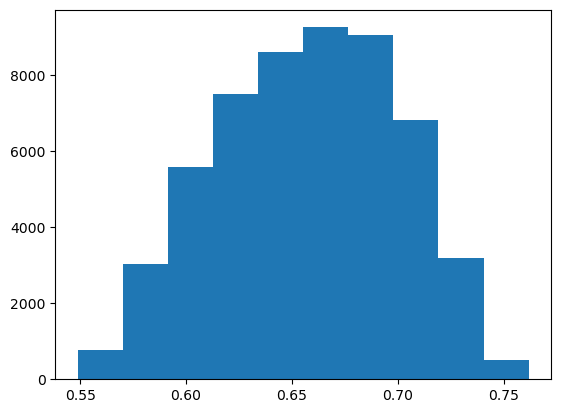

In [995]:
plt.hist(pc)

In [996]:
w01 = 1/(pc) [ti==1]
w02 = 1/(pc )[ti==2]
w03 = 1/(pc) [ti==3]
w04 = 1/(pc) [ti==4]

In [1025]:
wts1 = np.where(gold1 == 1, w01/np.mean(gold1), 1/(1-pc) [ti==1])
wts2 = np.where(gold2 == 1, w02/np.mean(gold2), 1/(1-pc) [ti==2])
wts3 = np.where(gold3 == 1, w03/np.mean(gold3), 1/(1-pc) [ti==3])
wts4 = np.where(gold4 == 1, w04/np.mean(gold4), 1/(1-pc) [ti==4])

(array([ 188.,  664., 1222., 1747., 2159., 2021., 1598., 1170.,  467.,
         140.]),
 array([1.35936914, 1.40526034, 1.45115155, 1.49704275, 1.54293395,
        1.58882515, 1.63471635, 1.68060755, 1.72649875, 1.77238995,
        1.81828115]),
 <BarContainer object of 10 artists>)

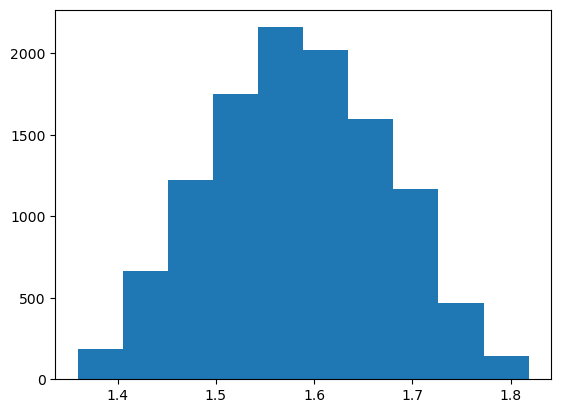

In [1026]:
plt.hist(w04)

In [1027]:
def weighted_temp2_scaling_i (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res

In [1028]:
temp4 = weighted_temp2_scaling_i(logit(mp4), gold4, wts4)

In [1029]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit   + alpha[1] )/ alpha[0]      
    proba = expit ( logi  )              #*tt.x[5]    
    return proba

In [1030]:
temp4

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.6284422147144466
        x: [ 1.481e+00  1.620e+00]
      nit: 23
      jac: [-4.545e-07 -3.949e-07]
 hess_inv: [[ 4.646e+01 -2.643e+01]
            [-2.643e+01  2.481e+01]]
     nfev: 75
     njev: 25

In [1031]:
cal_4 = temp_pred2 ( temp4.x, logit(tp4) )


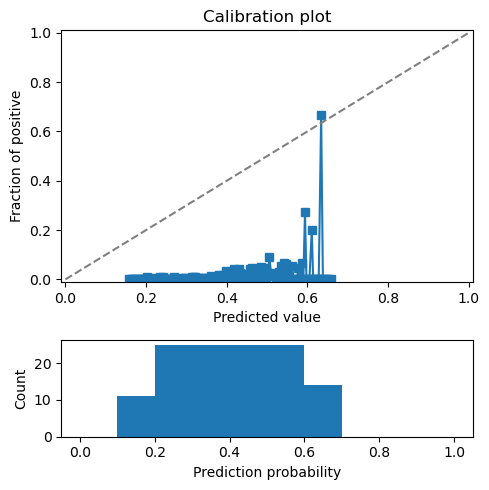

In [1032]:
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins =250)
plotter(p4, y4)

(array([1.1289e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 5.3000e+01, 2.6000e+01]),
 array([  2.22207385,  24.92490599,  47.62773812,  70.33057026,
         93.03340239, 115.73623453, 138.43906666, 161.1418988 ,
        183.84473093, 206.54756307, 229.25039521]),
 <BarContainer object of 10 artists>)

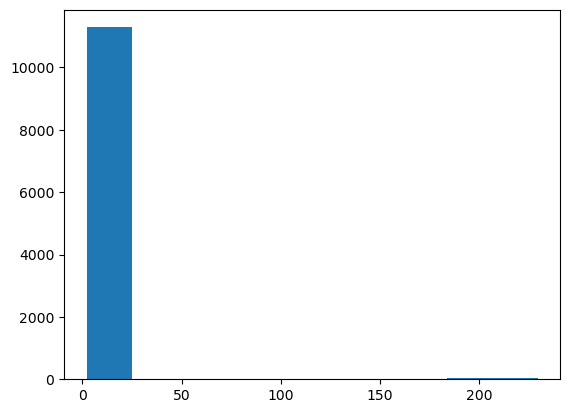

In [1033]:
plt.hist(wts4)

In [1034]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        
        p1  = expit (t[0] *  logi_1  )  
        p2  = expit ( t[0] *  logi_2  )  
        p3  = expit (t[0] *  logi_3  )  
        p4  = expit ( t[0] * logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [1035]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [1036]:
tt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.438140854642998
        x: [ 6.826e-02  4.126e-01  1.320e+00  1.796e+00  1.620e+00
             8.964e-02  6.711e-02  6.753e-02  1.011e-01]
      nit: 43
      jac: [ 1.490e-07  2.980e-08  0.000e+00 -5.960e-08 -1.490e-07
             1.311e-06  6.557e-07  1.281e-06 -1.490e-06]
 hess_inv: [[ 4.036e-02 -1.707e-01 ...  3.277e-02 -1.930e-02]
            [-1.707e-01  2.888e+01 ... -1.989e-01 -1.567e-01]
            ...
            [ 3.277e-02 -1.989e-01 ...  7.814e-02 -2.024e-02]
            [-1.930e-02 -1.567e-01 ... -2.024e-02  7.499e-02]]
     nfev: 560
     njev: 56

In [1037]:
def temp_pred  ( j1,j2, test_logit):    
    logi =  ( test_logit   + j1) / j2     
    proba = expit (  logi *tt.x[0]  )  
    return proba

In [1047]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 500)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 500)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 500)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 500)



(array([ 635., 2118., 2460., 2292., 1676., 1104.,  761.,  427.,  186.,
          22.]),
 array([0.15643467, 0.20655448, 0.25667429, 0.3067941 , 0.35691391,
        0.40703372, 0.45715353, 0.50727334, 0.55739315, 0.60751296,
        0.65763277]),
 <BarContainer object of 10 artists>)

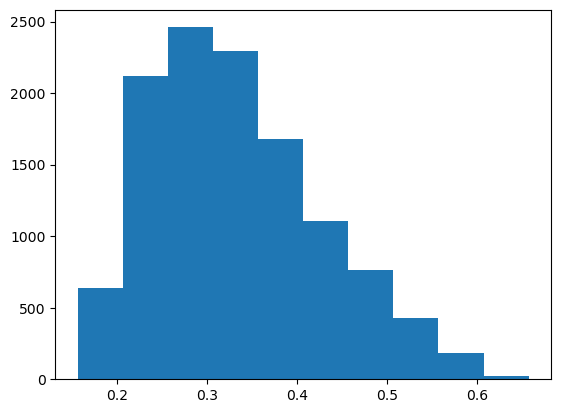

In [1048]:
plt.hist(cal_4)

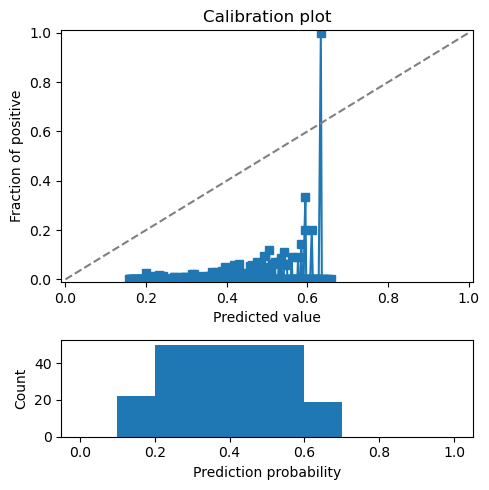

In [1049]:
plotter(p4, y4)

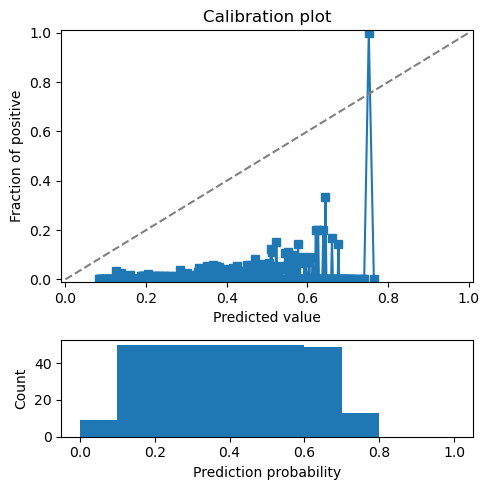

In [1050]:
plotter(p3, y3)


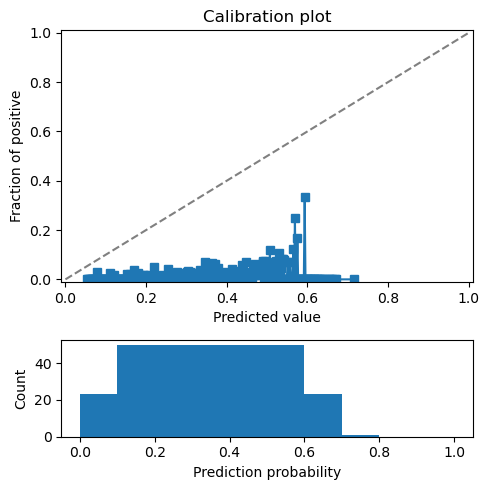

In [1051]:
plotter(p2, y2)

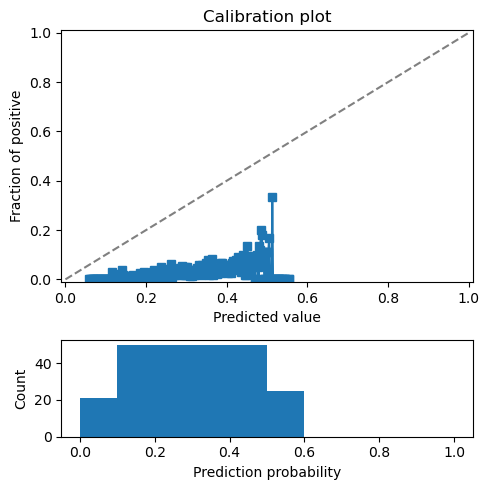

In [1052]:
plotter(p1, y1)

In [163]:
tt5  = temperature_multi_5( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [164]:
def temp_pred5  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit (  logi / tt.x[0]  )  
    return proba

In [20]:
import sklearn
from sklearn.metrics import confusion_matrix

In [224]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')


sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')


In [226]:
( confusion_matrix (tgold1,  tc1>.5) )

array([[8111, 7408],
       [ 145,  361]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)